# Hypergeometric summation

In [1]:
from sympy import *
x, y = symbols("x y")
init_printing()

def shift_operator(f, k=1):
    if isinstance(f, int):
        return f
    else:
        return f.subs({x: x + k})

def falling_factorial(f, m):
    p = 1
    for i in range(m):
        p *= shift_operator(f, i)

    return p

def multiple_of_summation_denominator(a, b):
    """
    Input: Polynomials a,b where gcd(a, b) != 1 and b != 0 monic

    Output: A monic polynomial V for which v divides V as desribed in Section 4.3
    """
    R = resultant(a, b.subs({x: x + y}))
    d = max(
        [0, *[r for r in solve(R) if r.is_integer and r > 0]]
    )
    if d == 0:
        return 1
    else:
        V = 1
        for i in range(1, d+1):
            H_i = gcd(shift_operator(a, -1), shift_operator(b, i-1))
            V *= falling_factorial(H_i, i)

        return expand(V)

def hypergeometric_summation(a, b, show_info=False):
    """
    Input: Nonzero coprime polynomials a, b where b != monic

    Output: Coprime polynomials u, v such that a v \cdot E u - b u \cdot E v = b v \cdot E v if they exist
    """
    V = multiple_of_summation_denominator(a, b)
    h = expand(
        gcd(a * V, b * shift_operator(V, 1))
    )
    r = expand(simplify(a*V/h))
    s = expand(simplify(b * shift_operator(V, 1) / h))
    t = expand(simplify(s * V))

    if show_info:
        display("V")
        display(V)
        display("h, r, s, t")
        display(h, r, s, t)

    m = max(
        degree(r, x) - 1,
        degree(s - r, x)
    )
    delta = (s - r).coeff(x, m)
    
    if show_info: print(f"""m = {m} \ndelta = {delta}""")

    if degree(r, x) - 1 < degree(s - r, x) or (not (delta.is_integer and delta >= 0)):
        e = degree(t, x) - m
        if show_info: print(f"""Case 1) e = {e} """)
    elif degree(t, x) - m == delta:
        if show_info: print("Case 2)")
        return "unsolvable"
    else:
        e = max(degree(t, x) - m, delta)
        if show_info: print(f"""Case 3) e = {e} """)
        if show_info: print(f"""delta = {delta}, degree(t, x) - m = {degree(t, x) - m}""")

    if e < 0:
        if show_info: print("""e < 0""")
        return "unsolvable"
    
    U_coeffs = symbols(f"U0:{e+1}")
    U = sum([
        U_i * x**i for i, U_i in enumerate(U_coeffs)
    ])
    if show_info: display(U)

    lhs = expand(r * shift_operator(U, 1) - s * U)
    rhs = t

    equations = []
    l = max(degree(lhs, x), degree(rhs, x))
    for i in range(l+1):
        equations.append(
            Eq(lhs.coeff(x, i), rhs.coeff(x, i))
        )
    if show_info: 
        print("Linear system")
        [display(equation) for equation in equations]

    solution = solve(equations)
    display(solution)
    if solution == []:
        return "unsolvable"
    else:
        Up = sum([solution.get(U_coeffs[i], 0) * x**i for i in range(e+1)])
        
        if show_info:
            print("Solution")
            display(solution)  
            print("so U =")  
            display(Up)

        return simplify(Up/gcd(Up, V)), simplify(V/gcd(Up, V))

## Example 1

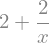

In [3]:
g = x*2**x
display(g)
simplify(shift_operator(g) / g)

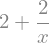

In [5]:
a = 2 * x + 2
b = x
display(simplify(a/b))

In [7]:
u, v = hypergeometric_summation(a, b, show_info=True)

'V'

'h, r, s, t'

m = 0 
delta = -1
Case 1) e = 1 


Linear system


Solution


so U =


In [8]:
display(u, v)

In [10]:
f = u / v * g
display(f)
simplify(f.subs({x: x+1}) - f), g